In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import voigt_profile

Ajuste para el primer pico n = 1, K_beta

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_22744\900154378.py:15: RuntimeWarning: overflow encountered in divide
  return amplitude * np.real(wofz(((x - center) + 1j * gamma) / (sigma * np.sqrt(2)))) / (sigma * np.sqrt(2 * np.pi))


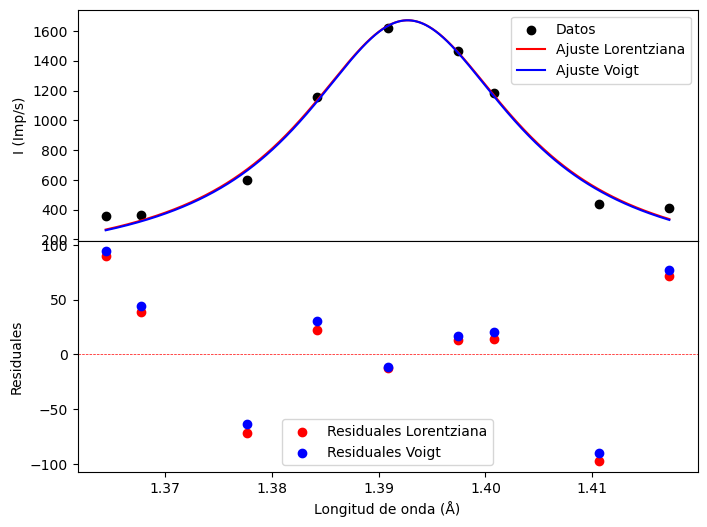

Parámetros ajustados para Lorentziana:
Amplitud = 1671.4173049224394 ± 59.39753976421038
Centro = 1.3927073799498497 ± 0.0004233661893512368
Ancho = 0.01231180868145129 ± 0.000720533284833281

Parámetros ajustados para Voigt:
Amplitud = -63.98627524018764 ± 4.169883514830406
Centro = 1.3927113436969516 ± 0.00047020127827613196


In [17]:
# Ruta completa al archivo CSV
ruta_archivo_csv = "C:\\Users\\ALEJANDRO\\Documents\\APM 2023\\SEMESTRE 6\\LABORATORIO INTERMEDIO\\EXPERIMENTOS\RAYOS X\\DATOS CSV\\modact1.csv"
datos = pd.read_csv(ruta_archivo_csv, decimal = ",", sep = ";", encoding="utf-8")

L_pico1 = np.sin(np.radians(datos["A"][152:161]/2 + 1.6))*2*(2.014)
I_pico1 = datos["T"][152:161]

# Define la función Lorentziana
def lorentzian(x, amplitude, center, width):
    return amplitude / (1 + ((x - center) / width)**2)

# Define la función Voigt
from scipy.special import wofz
def voigt(x, amplitude, center, sigma, gamma):
    return amplitude * np.real(wofz(((x - center) + 1j * gamma) / (sigma * np.sqrt(2)))) / (sigma * np.sqrt(2 * np.pi))


# Ajuste de Lorentziana
initial_guess_lorentzian = [max(I_pico1 ), np.mean(L_pico1), 1.0]  # Valores iniciales para ajuste
params_lorentzian, covariance_lorentzian = curve_fit(lorentzian, L_pico1, I_pico1 , p0=initial_guess_lorentzian, maxfev=50000)

# Ajuste de perfil Voigt
initial_guess_voigt = [max(I_pico1), np.mean(L_pico1), 0.1 , 0.12]  # Valores iniciales para ajuste
params_voigt, covariance_voigt = curve_fit(voigt, L_pico1, I_pico1 , p0=initial_guess_voigt, maxfev=50000)

# Genera curvas ajustadas
L_pico1_fit = np.linspace(min(L_pico1), max(L_pico1), 1000)
I_pico1_fit_lorentzian = lorentzian(L_pico1_fit, *params_lorentzian)
I_pico1_fit_voigt = voigt(L_pico1_fit, *params_voigt)

# Calcula los valores predichos por las funciones ajustadas
I_pico1_pred_lorentzian = lorentzian(L_pico1, *params_lorentzian)
I_pico1_pred_voigt = voigt(L_pico1, *params_voigt)

# Calcula los residuos
residuos_lorentzian = I_pico1 - I_pico1_pred_lorentzian
residuos_voigt = I_pico1 - I_pico1_pred_voigt

# Obtener errores estándar de los parámetros (raíces cuadradas de las varianzas en la diagonal de la matriz de covarianza)
errors_lorentzian = np.sqrt(np.diag(covariance_lorentzian))
errors_voigt = np.sqrt(np.diag(covariance_voigt))

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))


# Grafica los datos y las curvas ajustadas
ax1.scatter(L_pico1, I_pico1, label='Datos',color='black')
ax1.plot(L_pico1_fit, I_pico1_fit_lorentzian, 'r-', label='Ajuste Lorentziana')
ax1.plot(L_pico1_fit, I_pico1_fit_voigt, color = "blue", label='Ajuste Voigt')
#ax1.set_xlabel('longitud de onda (Å)')
ax1.set_ylabel('I (Imp/s)')
ax1.legend()

# Grafica los residuos
ax2.scatter(L_pico1, residuos_lorentzian, label='Residuales Lorentziana', color='red')
ax2.scatter(L_pico1, residuos_voigt, label='Residuales Voigt', color='blue')
ax2.axhline(0, color='red', linestyle='--', linewidth=0.5)
ax2.set_xlabel('Longitud de onda (Å)')
ax2.set_ylabel('Residuales')
ax2.legend()

plt.subplots_adjust(hspace=0.0)
plt.show()

print("Parámetros ajustados para Lorentziana:")
print(f"Amplitud = {params_lorentzian[0]} ± {errors_lorentzian[0]}")
print(f"Centro = {params_lorentzian[1]} ± {errors_lorentzian[1]}")
print(f"Ancho = {params_lorentzian[2]} ± {errors_lorentzian[2]}")

print("\nParámetros ajustados para Voigt:")
print(f"Amplitud = {params_voigt[0]} ± {errors_voigt[0]}")
print(f"Centro = {params_voigt[1]} ± {errors_voigt[1]}")

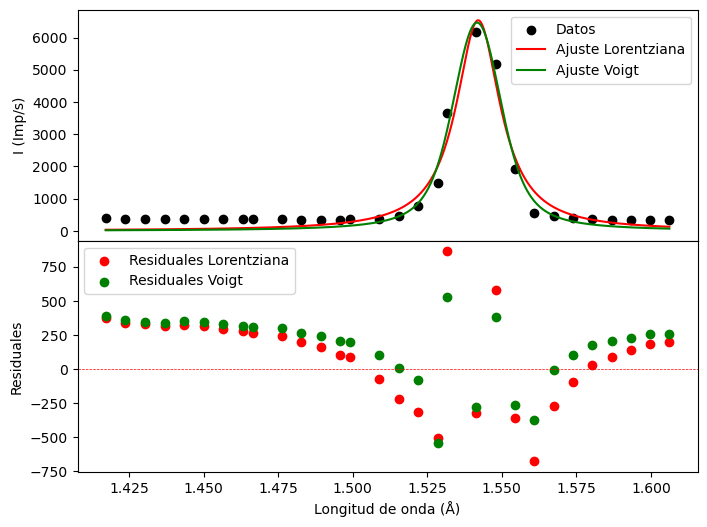

Parámetros ajustados para Lorentziana:
Amplitud = 6535.708683889618 ± 335.3711116536101
Centro = 1.5420867918940326 ± 0.0005342940836107639
Ancho = -0.009015397856838967 ± 0.00061460333636587

Parámetros ajustados para Voigt:
Amplitud = 167.15025935596273 ± 10.700920265089575
Centro = 1.541708197375243 ± 0.00043503069290922624


In [25]:
ruta_archivo_csv = "C:\\Users\\ALEJANDRO\\Documents\\APM 2023\\SEMESTRE 6\\LABORATORIO INTERMEDIO\\EXPERIMENTOS\RAYOS X\\DATOS CSV\\modact1.csv"
datos = pd.read_csv(ruta_archivo_csv, decimal = ",", sep = ";", encoding="utf-8")

L_pico1 = np.sin(np.radians(datos["A"][160:190]/2 + 1.6))*2*(2.014)
I_pico1 = datos["T"][160:190]

# Define la función Lorentziana
def lorentzian(x, amplitude, center, width):
    return amplitude / (1 + ((x - center) / width)**2)

# Define la función Voigt
from scipy.special import wofz
def voigt(x, amplitude, center, sigma, gamma):
    return amplitude * np.real(wofz(((x - center) + 1j * gamma) / (sigma * np.sqrt(2)))) / (sigma * np.sqrt(2 * np.pi))


# Ajuste de Lorentziana
initial_guess_lorentzian = [max(I_pico1 ), np.mean(L_pico1), 1.0]  # Valores iniciales para ajuste
params_lorentzian, covariance_lorentzian = curve_fit(lorentzian, L_pico1, I_pico1 , p0=initial_guess_lorentzian, maxfev=500000)

# Ajuste de perfil Voigt
initial_guess_voigt = [max(I_pico1), np.mean(L_pico1), 0.1 , 0.1]  # Valores iniciales para ajuste
params_voigt, covariance_voigt = curve_fit(voigt, L_pico1, I_pico1 , p0=initial_guess_voigt, maxfev=500000)

# Genera curvas ajustadas
L_pico1_fit = np.linspace(min(L_pico1), max(L_pico1), 1000)
I_pico1_fit_lorentzian = lorentzian(L_pico1_fit, *params_lorentzian)
I_pico1_fit_voigt = voigt(L_pico1_fit, *params_voigt)

# Calcula los valores predichos por las funciones ajustadas
I_pico1_pred_lorentzian = lorentzian(L_pico1, *params_lorentzian)
I_pico1_pred_voigt = voigt(L_pico1, *params_voigt)

# Calcula los residuos
residuos_lorentzian = I_pico1 - I_pico1_pred_lorentzian
residuos_voigt = I_pico1 - I_pico1_pred_voigt
# Obtener errores estándar de los parámetros (raíces cuadradas de las varianzas en la diagonal de la matriz de covarianza)
errors_lorentzian = np.sqrt(np.diag(covariance_lorentzian))
errors_voigt = np.sqrt(np.diag(covariance_voigt))

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))


# Grafica los datos y las curvas ajustadas
ax1.scatter(L_pico1, I_pico1, label='Datos',color='black')
ax1.plot(L_pico1_fit, I_pico1_fit_lorentzian, 'r-', label='Ajuste Lorentziana')
ax1.plot(L_pico1_fit, I_pico1_fit_voigt, 'g-', label='Ajuste Voigt')
#ax1.set_xlabel('longitud de onda (Å)')
ax1.set_ylabel('I (Imp/s)')
ax1.legend()

# Grafica los residuos
ax2.scatter(L_pico1, residuos_lorentzian, label='Residuales Lorentziana', color='red')
ax2.scatter(L_pico1, residuos_voigt, label='Residuales Voigt', color='green')
ax2.axhline(0, color='red', linestyle='--', linewidth=0.5)
ax2.set_xlabel('Longitud de onda (Å)')
ax2.set_ylabel('Residuales')
ax2.legend()

plt.subplots_adjust(hspace=0.0)
plt.show()

print("Parámetros ajustados para Lorentziana:")
print(f"Amplitud = {params_lorentzian[0]} ± {errors_lorentzian[0]}")
print(f"Centro = {params_lorentzian[1]} ± {errors_lorentzian[1]}")
print(f"Ancho = {params_lorentzian[2]} ± {errors_lorentzian[2]}")

print("\nParámetros ajustados para Voigt:")
print(f"Amplitud = {params_voigt[0]} ± {errors_voigt[0]}")
print(f"Centro = {params_voigt[1]} ± {errors_voigt[1]}")